In [102]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from skimage import data, io, filters, feature
from skimage import measure
from scipy import ndimage as ndi




#2
csvFile = open("GTI770_label_data_set.csv", "r")
countTotal = 0
countSmooth = 0
countSpiral = 0
nbImages = 100
img_h = 424
img_w = 424
crop_value = 100

X = np.zeros((nbImages, 3, img_h, img_w),dtype=int) # matrice X de la forme (nombre d'image, nombre de canaux(RGB), hauteur, largeur)
Y = np.zeros((nbImages, 1), 'U6')     # matrice Y de la forme (nombre d'image, la classe)

def prepareImg(imagePath, countTotal):
    img = cv2.imread(imagePath)
    img = img.reshape(3, img_h, img_w)
    X[countTotal] = img        # ajouter l'image dans la matrice X
    Y[countTotal] = imageClass # ajouter sa classe dans la matrice Y
    #print(countTotal, ": preparing "+imagePath)
        

for i in csvFile:
    imageId, imageClass = i.split(',')
    imageClass = imageClass[0:6]
    if imageId != "id":
        imagePath = './images_training/' + imageId + '.jpg'
        
        if imageClass == "smooth" : # si la classe de l'image est 'smooth'
            if countSmooth == nbImages/2 :  # s'il y a 50 image de cette classe
                continue            # passe a la prochaine image
            countSmooth += 1
        elif imageClass == "spiral" :
            if countSpiral == nbImages/2 :
                continue
            countSpiral += 1
        else :
            continue
        if not os.path.exists(imagePath):
            continue
        #
        
        #img = simple_threshold(img, threshold=10)
        prepareImg(imagePath, countTotal)
        countTotal += 1
   
        if countTotal == nbImages: # arrete a nbImages images totales (50 de chaque classe)
            print("smooth", countSmooth)
            print("spiral", countSpiral)
            break
            


smooth 50
spiral 50


In [103]:
def cropImages(matrix, crop_val):
    len = matrix.shape[0]
    print("cropping",len,"images to",crop_val)
    X_train_crop = np.zeros((len, 3, crop_val, crop_val), dtype=np.uint8)
    for i in range(0,len):
        image = matrix[i].reshape(img_h, img_w, 3)
        image = image[424 // 2 - crop_val // 2 : 424 // 2 + crop_val // 2, 424 // 2 - crop_val // 2 : 424 // 2 + crop_val // 2] # garder 25 de chaque cote depuis le milieu, pour chaque axe
        image = image.reshape(3, crop_val, crop_val)
        X_train_crop[i] = image
    return X_train_crop

x_cropped = cropImages(X, 200)

cropping 100 images to 200


len 100
image 1


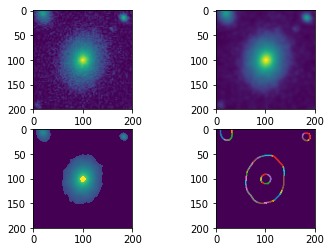

image 2


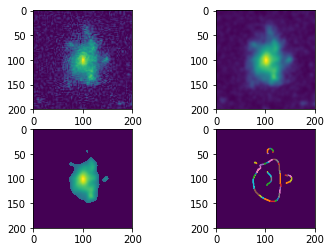

image 3


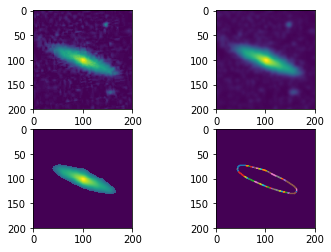

image 4


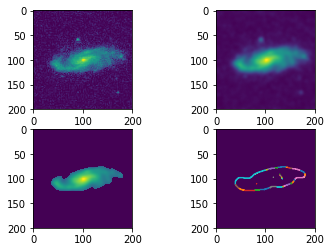

image 5


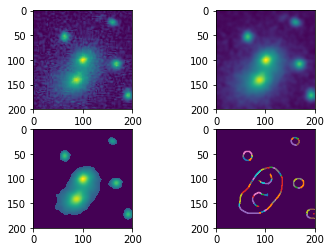

image 6


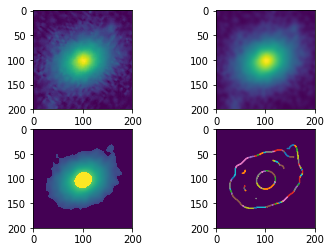

image 7


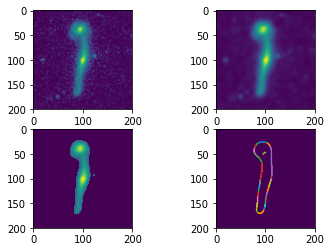

image 8


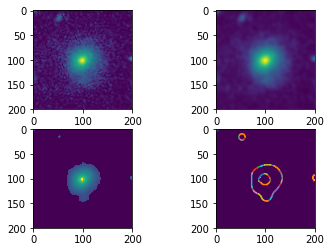

image 9


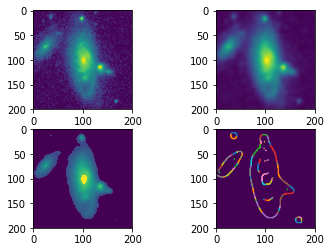

image 10


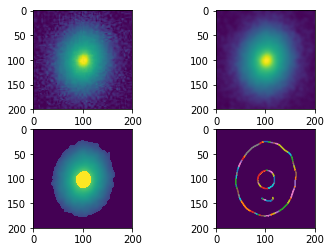

image 11


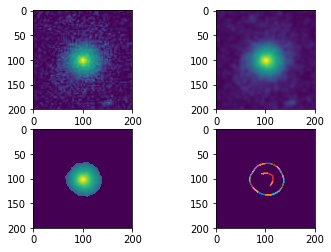

image 12


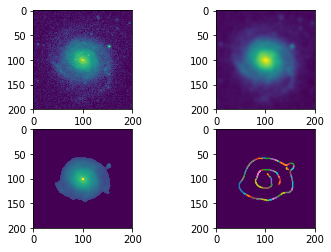

image 13


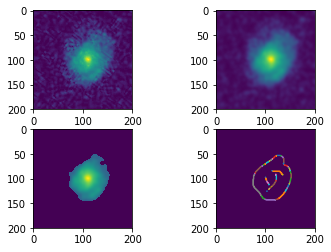

image 14


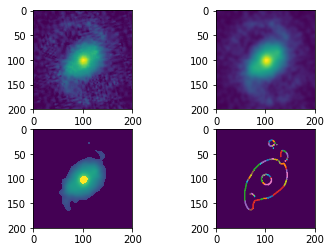

image 15


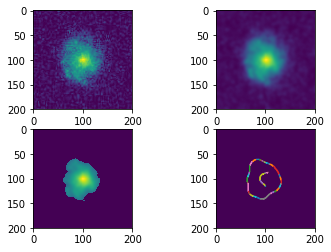

image 16


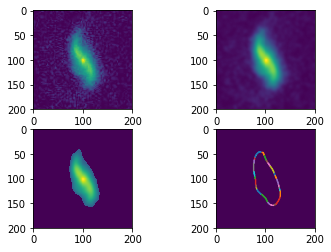

image 17


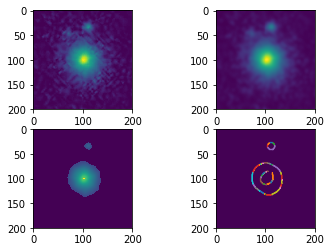

image 18


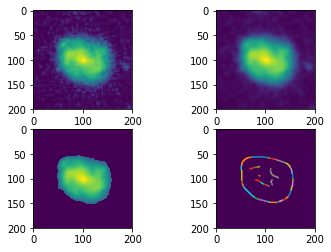

image 19


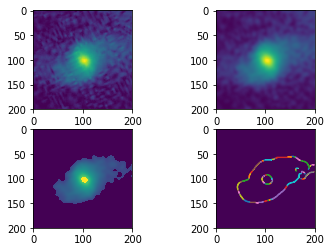

image 20


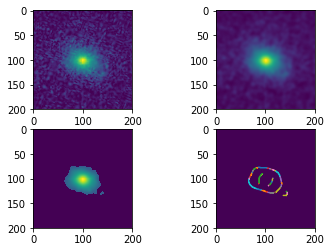

image 21


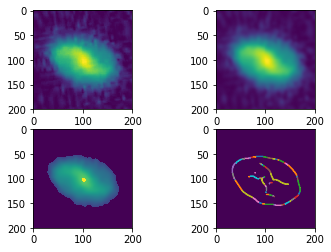

image 22


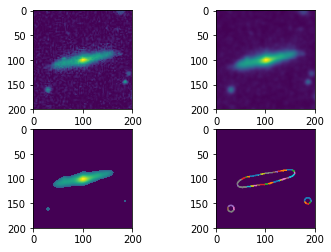

image 23


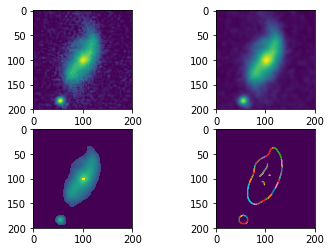

image 24


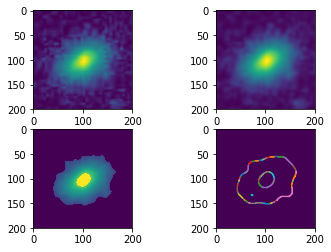

image 25


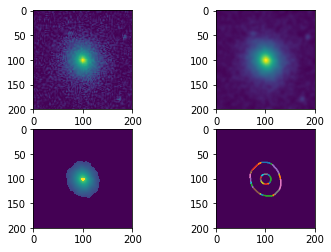

image 26


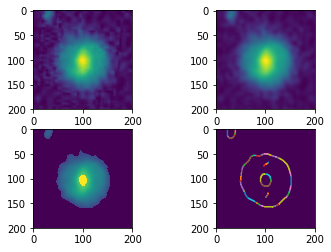

image 27


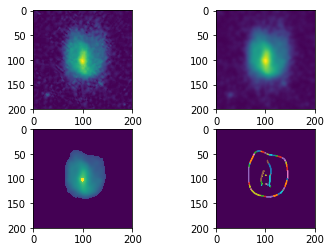

image 28


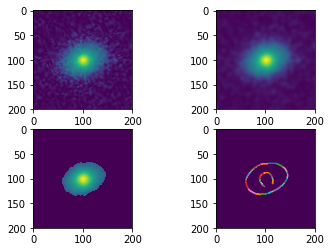

image 29


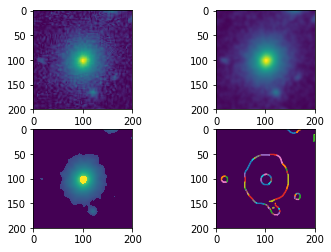

image 30


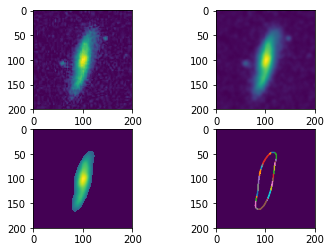

image 31


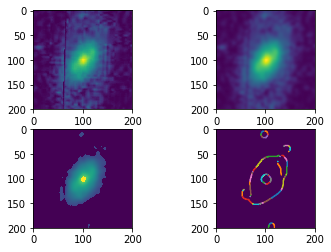

image 32


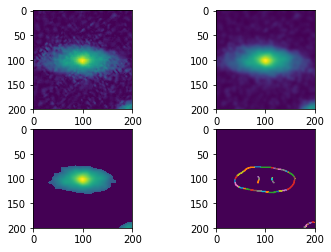

image 33


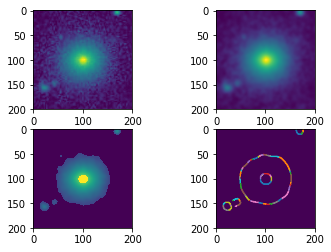

image 34


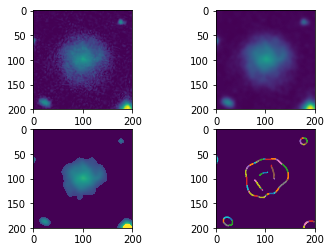

image 35


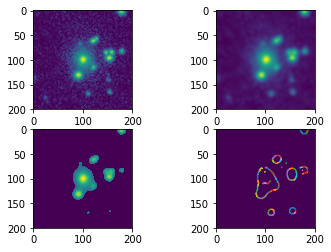

image 36


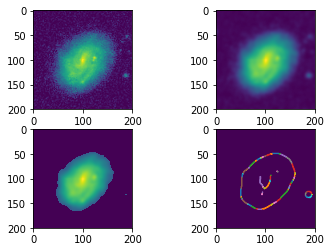

image 37


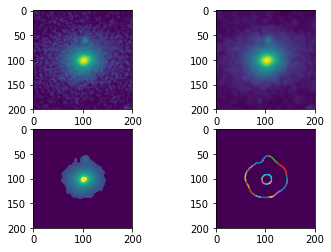

image 38


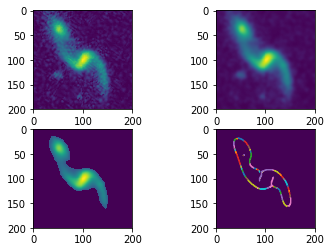

image 39


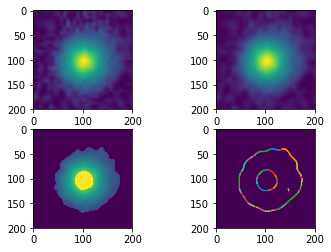

image 40


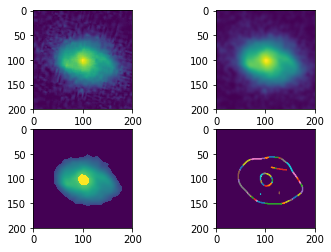

image 41


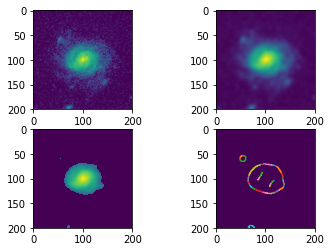

image 42


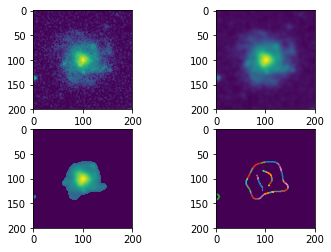

image 43


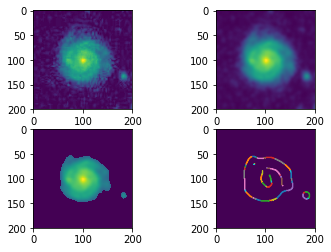

image 44


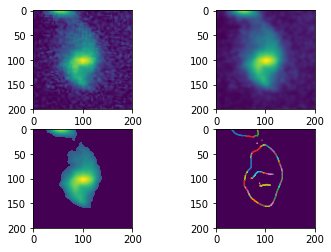

image 45


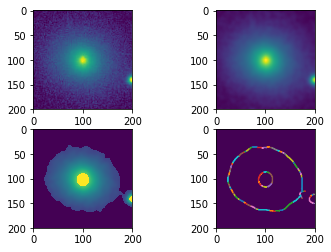

image 46


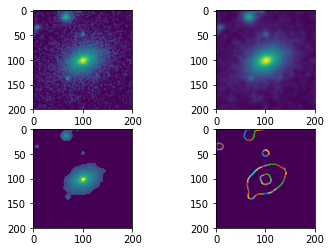

image 47


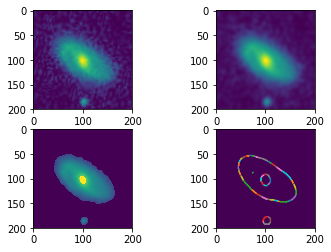

image 48


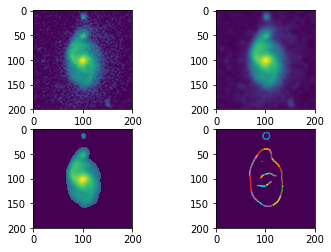

image 49


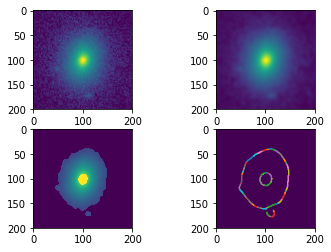

image 50


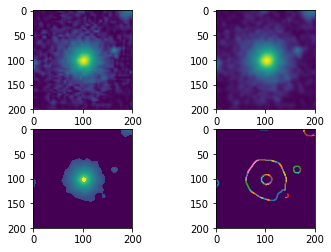

image 51


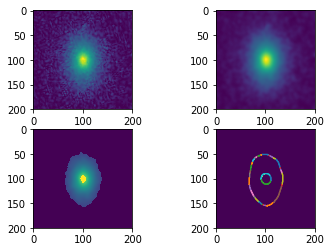

image 52


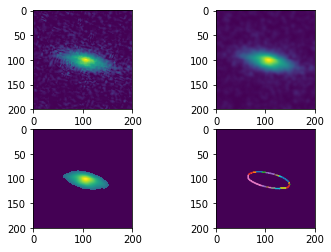

image 53


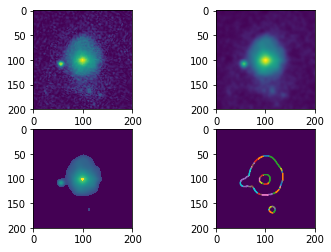

image 54


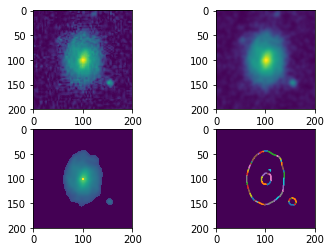

image 55


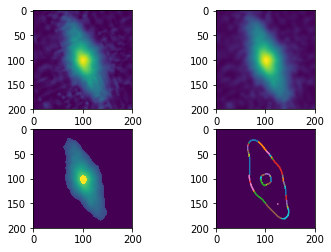

image 56


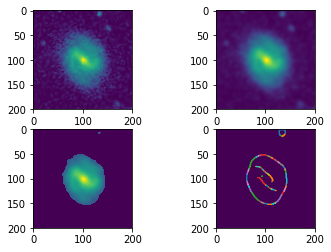

image 57


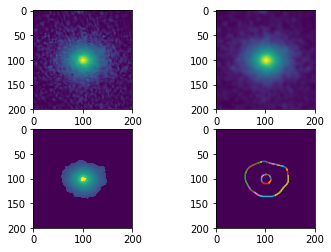

image 58


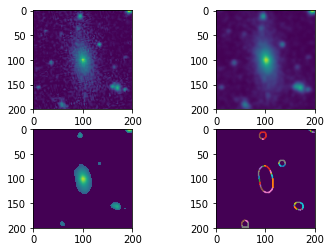

image 59


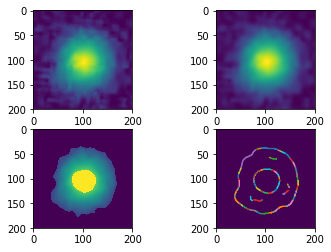

image 60


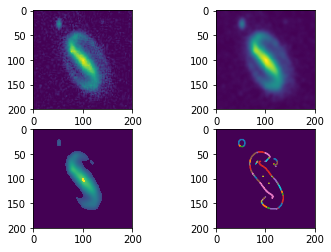

image 61


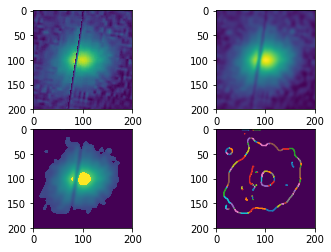

image 62


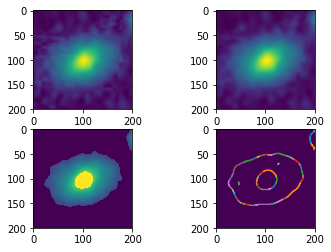

image 63


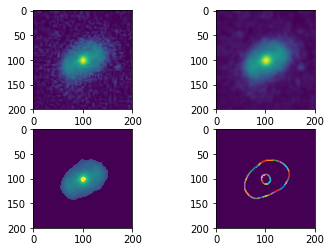

image 64


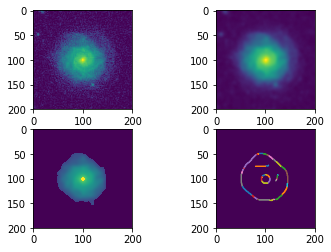

image 65


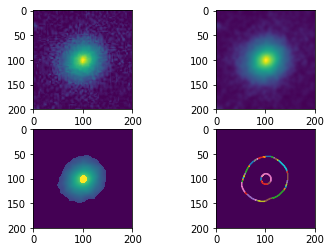

image 66


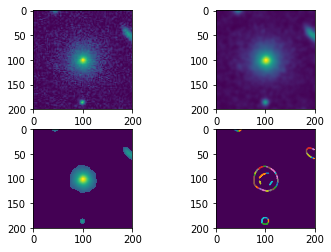

image 67


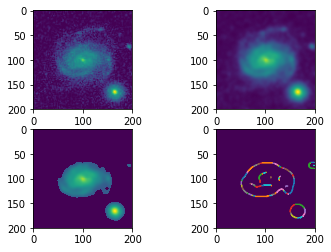

image 68


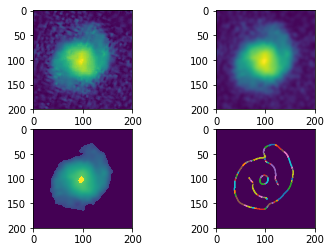

image 69


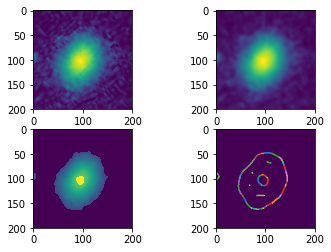

image 70


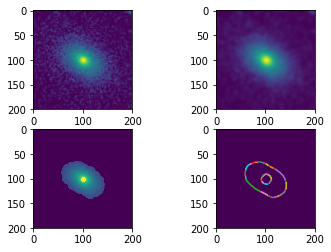

image 71


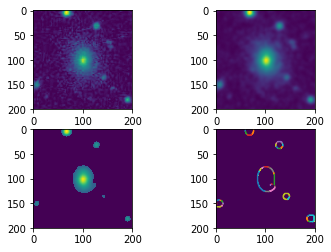

image 72


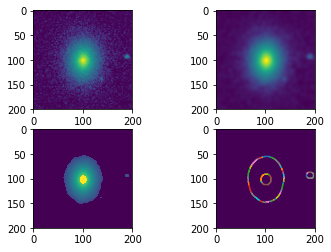

image 73


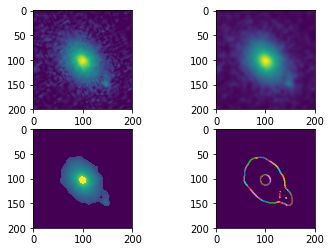

image 74


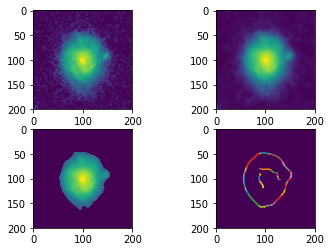

image 75


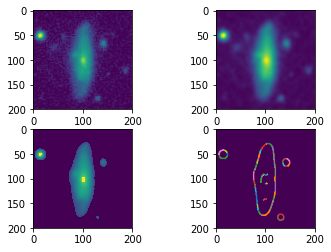

image 76


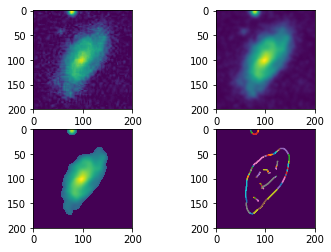

image 77


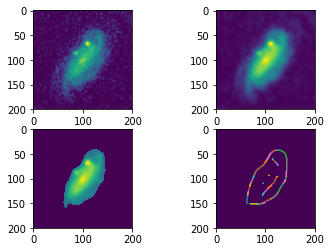

image 78


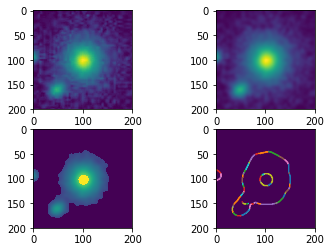

image 79


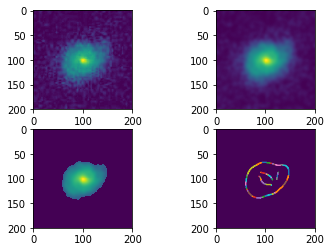

image 80


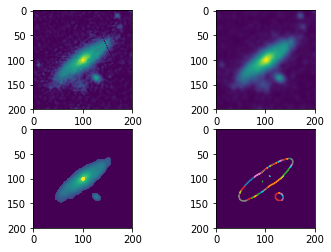

image 81


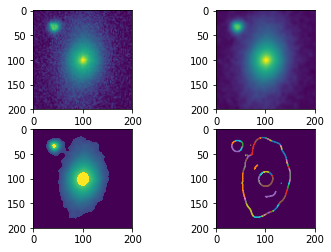

image 82


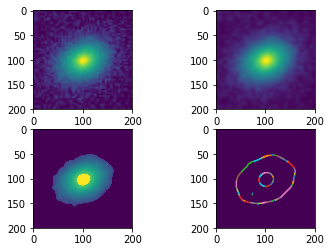

image 83


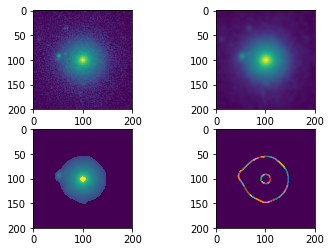

image 84


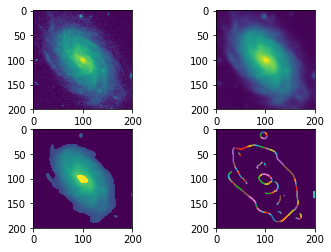

image 85


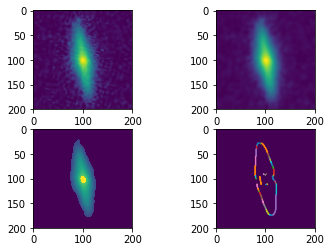

image 86


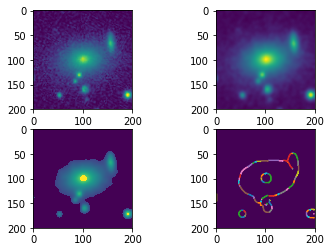

image 87


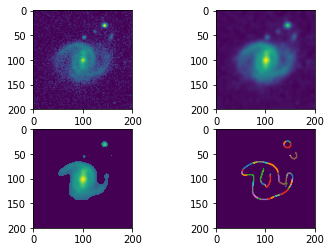

image 88


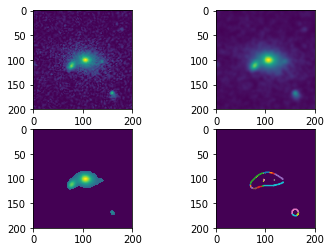

image 89


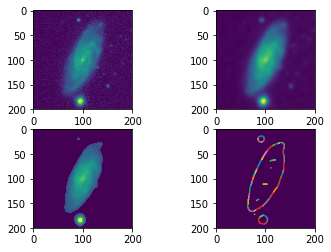

image 90


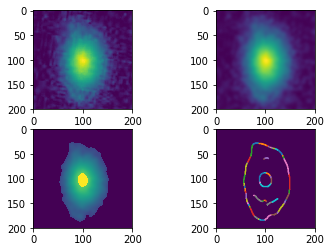

image 91


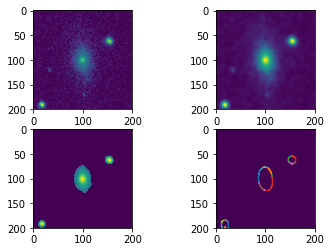

image 92


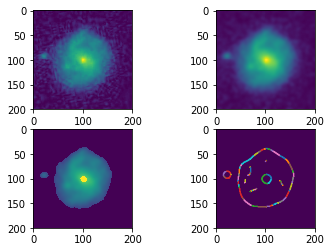

image 93


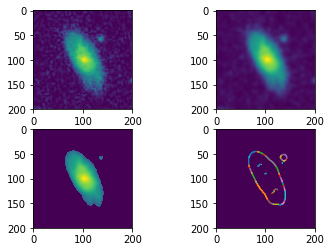

image 94


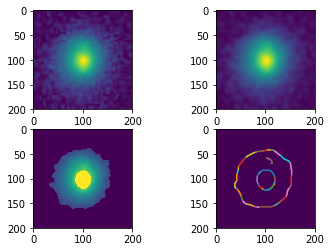

image 95


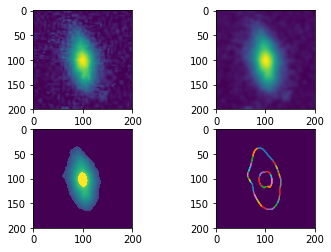

image 96


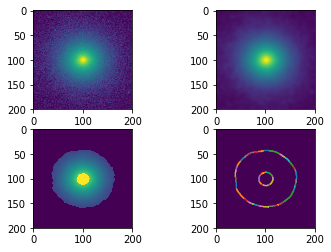

image 97


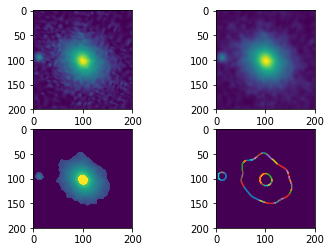

image 98


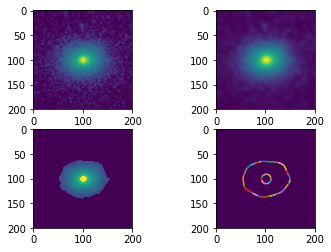

image 99


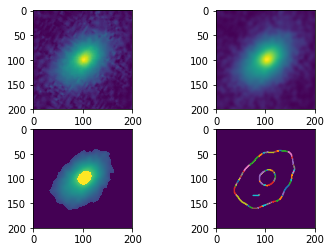

image 100


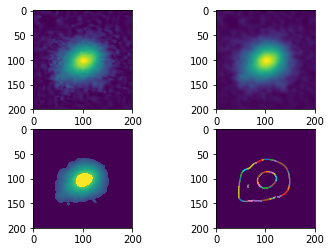

In [131]:
def treatImage(img):
    
    #image originale
    f = plt.figure()
    f.add_subplot(221)
    plt.imshow(img)
    
    #application du filtre gaussien pour réduire les artefacts
    img = filters.gaussian(img, sigma=3.0)
    f.add_subplot(222)
    plt.imshow(img)
    
    #enlèvement du bruit sur le fond noir
    img2 = np.where(np.logical_and(0<=img, img<=40), 0, img)
    im = np.where(np.logical_and(150<=img2, img2<=255), 200, img2)
    
    f.add_subplot(223)
    plt.imshow(im)
    
    
    #detection des rebords =6
    edges = feature.canny(im, sigma=6)
    contours = measure.find_contours(edges, level=0.6)
    
    #contours,hierarchy = cv2.findContours(thresh,2,1)
    #cnt = contours[0]

    #hull = cv2.convexHull(cnt,returnPoints = False)
    
    
    f.add_subplot(224)
    plt.imshow(edges)
    

    for n, cnt in enumerate(contours):
        
        plt.plot(cnt[:, 1], cnt[:, 0], linewidth=1)
    plt.show()

#mise en tons de gris
def grayscaleImages(matrix):
    len = matrix.shape[0]
    print("len", len)
    x_grayed = np.zeros((len, matrix[0].shape[1], matrix[0].shape[2]),dtype=int)
    for i in range(0,len):
        print("image", i+1)
        image = matrix[i].reshape( matrix[i].shape[1], matrix[i].shape[2], 3)
        imageGray = np.dot(image[...,:3], [0.299, 0.587, 0.114])
        treatImage(imageGray)
        imageGray = imageGray.reshape(1,matrix[i].shape[1], matrix[i].shape[2])
        x_grayed[i] = imageGray
        #plt.imshow(imageGray)
        #plt.show()
    return x_grayed
    
x_grayed = grayscaleImages(x_cropped)




##test, ne donne pas grand chose
#def meanImagePrimitive(image):
#    mean = image.mean(axis=0).mean()
#    mean = image.mean(axis=1).mean()
#    print("mean: - ", mean)



def showImages(matrix):
    len = matrix.shape[0]
    for i in range(0,len):
        image = matrix[i].reshape(matrix[i].shape[1], matrix[i].shape[2], 3)
        image = image.astype(np.uint8)
        meanImagePrimitive(image)
        #treatImage(image)
        plt.imshow(image)
        plt.show()

#showImages(x_cropped)


In [ ]:
#7 et #8
X_train_binary = np.zeros((70, 424, 424),dtype=int) # matrice X_train_binary avec 35 de chaque classe
X_train_plot = np.zeros((70, 2),dtype=int)          # matrice X_train_plot qui contient le nombre de pixels noirs (X[n][0]) et blancs(X[n][1])
countBinary = 0
for xtrain in X_train :
    image = X_train[countBinary].reshape(424, 424, 3)
    imageGray = np.dot(image[...,:3], [0.299, 0.587, 0.114])
    imageGray = imageGray.reshape(1,424,424)
    
    for i in range(0,423):   # passe au travers de chaque pixel
        for j in range(0,423):
            if imageGray[0][i][j]<50:  # si le treshold est inferieur a 50, on le considere comme noir
                X_train_binary[countBinary][i][j] = 0
                X_train_plot[countBinary][0] += 1   # incremente le compte pour les pixels noirs
            else :                     # sinon, on le considere comme blanc
                X_train_binary[countBinary][i][j] = 1
                X_train_plot[countBinary][1] += 1   # incremente le compte pour les pixels blancs
    countBinary += 1

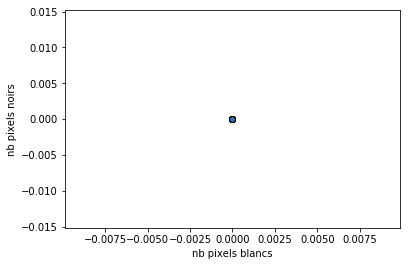

In [122]:
#9
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
graph = plt.scatter(X_train_plot[:,1], X_train_plot[:,0], edgecolors='k')
plt.xlabel('nb pixels blancs')
plt.ylabel('nb pixels noirs')
plt.show()